In [217]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
#!pip install seaborn

Fonte dos Dados : https://fbref.com/pt/comps/24/2021/stats/2021-Serie-A-estatisticas

![legenda.png](legenda.png)

Class. -- Classificação 
Essa é a contagem de linhas, de cima para baixo.
Ela é recalculada seguindo a organização de uma coluna.
Nação -- Nacionalidade do jogador.
Primeiro verificamos nossos registros de jogos internacionais a nível sênior.
Depois a nível de sub-21.
Depois verificamos a cidadania apresentada na wikipedia.
Por último, utilizamos o local de nascimento quando disponível.
Pos. -- Posição
Posição mais comumente jogada pelo jogador
G - Goleiros
ZG - Zagueiros
LT - Meio-campistas
AT - Em diante
ZG - Laterais
LE - Laterais Esquerdos
LD - Laterais Direitos
CB - Zagueiros
LT - Volantes
MC - Meio-campistas
ME - Meia-esquerdas
MD - Meia-direitas
GM - Armadores
PE - Pontas Esquerda
PD - Pontas Direita
MA - Meias Atacantes
Idade -- Idade no início da temporada
Dado em 1º de agosto para ligas de inverno
e 1º de fevereiro para ligas de verão.
Nascimento -- Ano de nascimento
Tempo de jogo
MP -- Jogos Disputados
Jogos disputados pelo jogador ou grupo
Inícios -- Jogo ou jogos jogado(s) pelo jogador
Min. -- Minutos
90s -- 90 min jogados
90s played
Minutos jogados dividido por 90
Desempenho
Gols -- Gols feitos ou auxiliados
Assis. -- Assistências
Assistências
G+A -- Gols + Assistências
Gols e assistências
G-PB -- Gols normais
Gols normais
PB -- Pênaltis batidos
Pênaltis batidos
PT -- Pênaltis tentados
Pênaltis tentados
CrtsA -- Cartões amarelos
Cartões amarelos
CrtV -- Cartões vermelhos
Cartões vermelhos
Esperado
xG -- Gols esperados
Totais de xG incluem pênaltis, porém não incluem disputas de pênalti (a menos que mencionado o contrário).
Fornecido pela Opta.
Uma sublinha indica que existe uma partida cujos dados não estão presentes, contudo, tais dados serão atualizados quando disponíveis.
npxG -- xG normal
Gols normais previstos
Fornecido pela Opta.
Uma sublinha indica que existe uma partida cujos dados não estão presentes, contudo, tais dados serão atualizados quando disponíveis.
xAG -- Gols Assistidos Esperados
Ponto xG seguinte a um passe que auxilia em um chute
Fornecido pela Opta.
Uma sublinha indica que existe uma partida cujos dados não estão presentes, contudo, tais dados serão atualizados quando disponíveis.
npxG+xAG -- npxG + xAG
Gols esperados, exceto pênaltis, mais gols assistidos
Totais de xG incluem pênaltis, porém não incluem disputas de pênalti (a menos que mencionado o contrário).
Fornecido pela Opta.
Uma sublinha indica que existe uma partida cujos dados não estão presentes, contudo, tais dados serão atualizados quando disponíveis.
Mínimo de 30 minutos jogadores por jogo para se qualificar como líder
Progressão
PrgC -- Carregadas Progressivas
Carrega a bola em direção à linha de gol do adversário a pelo menos 9 metros de seu ponto mais distante nos últimos seis passes, ou qualquer carregada para a área de penalidade. Exclui carregadas que terminam nos 50% do campo defensivo
PrgP -- Passes Progressivos
Passes Progressivos
Passes concluídos que movem a bola em direção à linha de gol do adversário a pelo menos 9 metros de seu ponto mais distante nos últimos seis passes, ou qualquer passe concluído para a área de penalidade. Exclui os passes dos 40% do campo defensivo
PrgR -- Passes Progressivos Rec
Passes progressivos recebidos
Passes concluídos que movem a bola em direção à linha de gol do adversário a pelo menos 9 metros de seu ponto mais distante nos últimos seis passes, ou qualquer passe concluído para a área de penalidade. Exclui os passes dos 40% do campo defensivo

In [219]:
#leitura do arquivo  csv do campeonato brasileiro


df2020 = pd.read_csv('dados/serie_a_BR_estatísticas_2020.csv', sep=',',encoding = "UTF-8")
df2021 = pd.read_csv('dados/serie_a_BR_estatísticas_2021.csv', sep=',',encoding = "UTF-8")
df2022 = pd.read_csv('dados/serie_a_BR_estatísticas_2022.csv', sep=',',encoding = "UTF-8")


In [220]:
print("(Qtd Linhas , Qtd Colunas) 2020 = " ,  df2020.shape)
print("(Qtd Linhas , Qtd Colunas) 2021 = " ,  df2021.shape)
print("(Qtd Linhas , Qtd Colunas) 2022 = " ,  df2022.shape)

(Qtd Linhas , Qtd Colunas) 2020 =  (753, 38)
(Qtd Linhas , Qtd Colunas) 2021 =  (731, 38)
(Qtd Linhas , Qtd Colunas) 2022 =  (763, 38)


In [221]:
df2020["temporada"] = 2020
df2021["temporada"] = 2021
df2022["temporada"] = 2022

In [222]:
df = pd.concat([df2020,df2021,df2022])

print("(Qtd Linhas , Qtd Colunas) 2020 a 2022 = " ,  df.shape)

(Qtd Linhas , Qtd Colunas) 2020 a 2022 =  (2247, 39)


In [223]:
df.reset_index(drop=True)

,Class.,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,MP,Inícios,Min.,...,G-PB.1,G+A-PB,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Partidas,-9999,temporada
0,1,Abner,br BRA,ZG,Atl Paranaense,19,2000,34,30,2.833,...,10,19,6.0,12.0,19.0,6.0,19.0,Partidas,7f9c5d2d,2020
1,2,Pedro Acacio,br BRA,LTZG,Palmeiras,17,2002,3,0,37.000,...,0,0,0.0,0.0,0.0,0.0,0.0,Partidas,1f4aaad9,2020
2,3,Luiz Adriano,br BRA,AT,Palmeiras,32,1987,24,19,1.538,...,47,64,44.0,9.0,54.0,29.0,39.0,Partidas,2557c196,2020
3,4,Adryelson,br BRA,ZG,Sport Recife,21,1998,36,36,3.216,...,0,0,2.0,0.0,2.0,2.0,2.0,Partidas,e980e78d,2020
4,5,Felipe Aguilar,co COL,ZG,Atl Paranaense,27,1993,11,5,532.000,...,0,0,4.0,1.0,5.0,4.0,5.0,Partidas,c285529f,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,759,Yago,br BRA,LTZG,Fluminense,26,1995,21,15,1.131,...,0,0,16.0,11.0,27.0,16.0,27.0,Partidas,e2add0e7,2022
2243,760,Ytalo,br BRA,AT,Bragantino,34,1988,11,7,625.000,...,43,43,18.0,4.0,22.0,18.0,22.0,Partidas,423e3d0b,2022
2244,761,Marcos Ytalo,br BRA,ZG,Ceará,25,1996,2,1,161.000,...,0,0,8.0,7.0,15.0,8.0,15.0,Partidas,70053afc,2022
2245,762,Vinícius Zanocelo,br BRA,LT,Santos,21,2001,28,26,2.004,...,13,13,15.0,6.0,21.0,15.0,21.0,Partidas,27457e83,2022


In [224]:
df.columns

Index(['Class.', 'Jogador', 'Nação', 'Pos.', 'Equipe', 'Idade', 'Nascimento',
       'MP', 'Inícios', 'Min.', '90s', 'Gols', 'Assis.', 'G+A', 'G-PB', 'PB',
       'PT', 'CrtsA', 'CrtV', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gols.1', 'Assis..1', 'G+A.1', 'G-PB.1', 'G+A-PB', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Partidas', '-9999',
       'temporada'],
      dtype='object')

In [225]:
df = df.drop(columns=['-9999','Partidas', 'Gols.1', 'Assis..1', 'G+A.1', 'G-PB.1', 'G+A-PB', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1','Idade','Class.','xG', 'npxG', 'xAG', 'npxG+xAG'])

df.columns = df.columns.str.lower()



In [226]:
df.columns = ['jogador', 'nacionalidade', 'posicao', 'equipe', 'nascimento', 'jogos_dispu.', 'inicios',
       'min_jogados', 'min_jogados_dividido 90', 'gols', 'assis.', 'gol_m_assis', 'gols_normais', 'penalti_batatidos', 'penalti_tentados', 'crts_a',
       'crt_v',  'carregadas_progressivas', 'passes_progressivos', 'passes_progressivos_recebidos',
       'temporada']

In [227]:
df.columns

Index(['jogador', 'nacionalidade', 'posicao', 'equipe', 'nascimento',
       'jogos_dispu.', 'inicios', 'min_jogados', 'min_jogados_dividido 90',
       'gols', 'assis.', 'gol_m_assis', 'gols_normais', 'penalti_batatidos',
       'penalti_tentados', 'crts_a', 'crt_v', 'carregadas_progressivas',
       'passes_progressivos', 'passes_progressivos_recebidos', 'temporada'],
      dtype='object')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 762
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jogador                        2247 non-null   object 
 1   nacionalidade                  2246 non-null   object 
 2   posicao                        2247 non-null   object 
 3   equipe                         2247 non-null   object 
 4   nascimento                     2247 non-null   int64  
 5   jogos_dispu.                   2247 non-null   int64  
 6   inicios                        2247 non-null   int64  
 7   min_jogados                    2247 non-null   float64
 8   min_jogados_dividido 90        2247 non-null   float64
 9   gols                           2247 non-null   int64  
 10  assis.                         2247 non-null   int64  
 11  gol_m_assis                    2247 non-null   int64  
 12  gols_normais                   2247 non-null   in

In [229]:
df.isna().sum()

jogador                           0
nacionalidade                     1
posicao                           0
equipe                            0
nascimento                        0
jogos_dispu.                      0
inicios                           0
min_jogados                       0
min_jogados_dividido 90           0
gols                              0
assis.                            0
gol_m_assis                       0
gols_normais                      0
penalti_batatidos                 0
penalti_tentados                  0
crts_a                            0
crt_v                             0
carregadas_progressivas          26
passes_progressivos              26
passes_progressivos_recebidos    26
temporada                         0
dtype: int64

In [230]:
#Verifica as linhas que estão NA
df[(df.nacionalidade.isna())]
df[(df.carregadas_progressivas.isna())]
df[(df.passes_progressivos.isna())]
df[(df.passes_progressivos_recebidos.isna())]

,jogador,nacionalidade,posicao,equipe,nascimento,jogos_dispu.,inicios,min_jogados,min_jogados_dividido 90,gols,...,gol_m_assis,gols_normais,penalti_batatidos,penalti_tentados,crts_a,crt_v,carregadas_progressivas,passes_progressivos,passes_progressivos_recebidos,temporada
126,Cesinha,br BRA,AT,Botafogo (RJ),1999,7,5,383.000,4.3,0,...,1,0,0,0,0,0,NaN,NaN,NaN,2020
203,Luis Felipe,br BRA,ZG,Santos,1993,13,12,898.000,10.0,0,...,0,0,0,0,1,0,NaN,NaN,NaN,2020
222,Flávio,br BRA,LT,Bahia,2000,1,0,10.000,0.1,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020
292,Pedro Henryque Maranhão,br BRA,AT,Sport Recife,1999,1,0,1.000,0.0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020
474,Gabriel Noga,br BRA,ZG,Flamengo,2002,2,1,142.000,1.6,0,...,0,0,0,0,1,0,NaN,NaN,NaN,2020
496,Bruno Pacheco,br BRA,ZG,Ceará,1991,29,29,2.579,28.7,0,...,2,0,0,0,5,1,NaN,NaN,NaN,2020
502,Guilherme Parede,br BRA,ATLT,Vasco da Gama,1995,11,1,233.000,2.6,0,...,0,0,0,0,2,0,NaN,NaN,NaN,2020
586,Francisco Rithely,br BRA,LT,Atl Goianiense,1991,3,0,20.000,0.2,0,...,0,0,0,0,1,0,NaN,NaN,NaN,2020
175,Edinho,br BRA,LT,Fortaleza,1994,13,1,199.000,2.2,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2021
199,Gabriel Falcão,br BRA,LT,São Paulo,2001,1,0,18.000,0.2,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2021


In [231]:
#ajustando nacionalidade vazia do Jogador Danilo
df.loc[(df.nacionalidade.isna()),"nacionalidade"] = "br BRA"

#Zerando valores progressivos de 26 linhas que estavam NA
df.loc[(df.carregadas_progressivas.isna()),"carregadas_progressivas"] = 0
df.loc[(df.passes_progressivos.isna()),"passes_progressivos"] = 0
df.loc[(df.passes_progressivos_recebidos.isna()),"passes_progressivos_recebidos"] = 0

In [232]:
df.jogador.sort_values().value_counts().head(10)

Diego             11
Gabriel           11
Vitinho           10
Pedrinho           9
Juninho            9
Marquinhos         7
Marlon             7
Pedro Henrique     7
Luiz Henrique      7
João Paulo         7
Name: jogador, dtype: int64

In [275]:
df.query('jogador == "João Paulo"')

,jogador,nacionalidade,posicao,equipe,nascimento,jogos_dispu.,inicios,min_jogados,min_jogados_dividido 90,gols,...,gol_m_assis,gols_normais,penalti_batatidos,penalti_tentados,crts_a,crt_v,carregadas_progressivas,passes_progressivos,passes_progressivos_recebidos,temporada
513,João Paulo,br BRA,G,Santos,1995,26,25,2.305,25.6,0,...,0,0,0,0,2,0,0.0,0.0,1.0,2020
512,João Paulo,br BRA,ZG,América (MG),1986,17,9,944.000,10.5,1,...,2,1,0,0,0,0,20.0,48.0,60.0,2021
513,João Paulo,br BRA,G,Santos,1995,33,33,2.970,33.0,0,...,0,0,0,0,6,0,0.0,0.0,0.0,2021
514,João Paulo,br BRA,G,Chapecoense,2001,20,19,1.767,19.6,0,...,0,0,0,0,0,0,0.0,0.0,0.0,2021
515,João Paulo,br BRA,LT,Juventude,1985,2,2,158.000,1.8,0,...,0,0,0,0,0,0,0.0,7.0,0.0,2021
523,João Paulo,br BRA,ZG,América (MG),1986,6,4,348.000,3.9,0,...,0,0,0,0,0,0,8.0,15.0,9.0,2022
524,João Paulo,br BRA,G,Santos,1995,37,37,3.330,37.0,0,...,0,0,0,0,5,0,0.0,2.0,0.0,2022


In [273]:
df.loc[(df["jogador"]=="Diego") & (df["equipe"] =="Botafogo (RJ)") ,"jogador"] = "Diego Loureiro"
df.loc[(df["jogador"]=="Diego") & (df["equipe"] =="Atl Goianiense") ,"jogador"] = "Diego Loureiro"
df.loc[(df["jogador"]=="Diego") & (df["equipe"] =="Flamengo") ,"jogador"] = "Diego Ribas"
df.loc[(df["jogador"]=="Diego") & (df["equipe"] =="São Paulo") ,"jogador"] = "Diego Costa"
df.loc[(df["jogador"]=="Diego") & (df["equipe"] =="América (MG)") ,"jogador"] = "Diego Ferreira"
df.loc[(df["jogador"]=="Diego") & (df["equipe"] =="Ceará") ,"jogador"] = "Diego Rigonato"


df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="Botafogo (RJ)") ,"jogador"] = "Gabriel Appelt Pires"
df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="São Paulo") ,"jogador"] = "Gabriel Sara"
df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="Atlético Mineiro") ,"jogador"] = "Gabriel Costa França"
df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="Corinthians") ,"jogador"] = "Gabriel Girotto Franco"
df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="Internacional") ,"jogador"] = "Gabriel Girotto Franco"
df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="Coritiba") & (df["temporada"]==2020) ,"jogador"] = "Gabriel Santana Pinto"
df.loc[(df["jogador"]=="Gabriel") & (df["equipe"] =="Coritiba") & (df["temporada"]==2022) ,"jogador"] = "Gabriel Vasconcelos Ferreira"


df.loc[(df["jogador"]=="Vitinho") & (df["equipe"] =="Flamengo")  ,"jogador"] = "Vitinho - Victor Vinícius Coelho dos Santos"
df.loc[(df["jogador"]=="Vitinho") & (df["equipe"] =="Atl Paranaense")  ,"jogador"] = "Vitinho - Vitor Hugo Naum dos Santos"
df.loc[(df["jogador"]=="Vitinho") & (df["equipe"] =="Avaí")  ,"jogador"] = "Vitinho - Victor Julio Alves de Paula"
df.loc[(df["jogador"]=="Vitinho") & (df["equipe"] =="Corinthians")  ,"jogador"] = "Vitinho - Victor Gabriel Moura de Oliveira"
df.loc[(df["jogador"]=="Vitinho") & (df["equipe"] =="Bragantino")   ,"jogador"] = "Vitinho - Victor Hugo Santana Carvalho"


df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="Atl Paranaense") & (df["nascimento"]==1999) & (df["temporada"]==2020)   ,"jogador"] = "Pedrinho - Pedro Gabriel Pereira Lopes"
df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="Atl Paranaense") & (df["nascimento"]==2002) ,"jogador"] = "Pedrinho - Pedro Henrique Azevedo Pereira"
df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="Ceará") & (df["nascimento"]==1998)  ,"jogador"] = "Pedrinho - Pedro Henrique Naressi Machado"
df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="Bragantino") & (df["nascimento"]==1999)  ,"jogador"] = "Pedrinho - Pedro Gabriel Pereira Lopes"
df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="América (MG)") & (df["nascimento"]==1999)  ,"jogador"] = "Pedrinho - Pedro Gabriel Pereira Lopes"
df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="Atlético Mineiro") & (df["nascimento"]==1998)  ,"jogador"] = "Pedrinho - Pedro Victor Delmino da Silva"
df.loc[(df["jogador"]=="Pedrinho") & (df["equipe"] =="Flamengo") & (df["nascimento"]==2003)  ,"jogador"] = "Pedrinho - Pedro Henrique Fonseca de Araújo Martins"


	
df.loc[(df["jogador"]=="Juninho") & (df["equipe"] =="América (MG)") & (df["nascimento"]==1987)  ,"jogador"] = "Juninho - Adilson dos Anjos Oliveira"
df.loc[(df["jogador"]=="Juninho") & (df["equipe"] =="América (MG)") & (df["nascimento"]==1986)  ,"jogador"] = "Juninho - Paulo Roberto Valoura Junior"
df.loc[(df["jogador"]=="Juninho") & (df["equipe"] =="Atl Paranaense") & (df["nascimento"]==2003)  ,"jogador"] = "Juninho - Luiz Fernando Silvestre Junior"
df.loc[(df["jogador"]=="Juninho") & (df["equipe"] =="Bahia") & (df["nascimento"]==1995)  ,"jogador"] = "Juninho - José Carlos Ferreira Júnior"
df.loc[(df["jogador"]=="Juninho") & (df["equipe"] =="Vasco da Gama") & (df["nascimento"]==2001)  ,"jogador"] = "Juninho - Alexandre de Almeida Silva Júnior"
df.loc[(df["jogador"]=="Juninho") & (df["equipe"] =="Fortaleza") & (df["nascimento"]==1986)  ,"jogador"] = "Juninho - Paulo Roberto Valoura Junior"


df.loc[(df["jogador"]=="Marquinhos") &  (df["nascimento"]==1997)  ,"jogador"] = "Marquinhos - Marcos Vinicius Sousa Natividade"
df.loc[(df["jogador"]=="Marquinhos") &  (df["equipe"] =="São Paulo") & (df["nascimento"]==2003)  ,"jogador"] = "Marquinhos - Marcus Vinícius Oliveira Alencar"


df.loc[(df["jogador"]=="Marlon") &  (df["equipe"] =="Fluminense") & (df["nascimento"]==1997)  ,"jogador"] = "Marlon Rodrigues Xavier"
df.loc[(df["jogador"]=="Marlon") &  (df["equipe"] =="América (MG)") & (df["nascimento"]==1994)  ,"jogador"] = "Marlon Matheus Lopes do Nascimento"
df.loc[(df["jogador"]=="Marlon") &  (df["nascimento"]==1990)  ,"jogador"] = "Marlon Adriano Prezotti"

df.loc[(df["jogador"]=="Pedro Henrique") & (df["equipe"] =="Atl Paranaense") &  (df["nascimento"]==1995)  ,"jogador"] = "Pedro Henrique Ribeiro Gonçalves"
df.loc[(df["jogador"]=="Pedro Henrique")  &  (df["nascimento"]==2001)  ,"jogador"] = "Pedro Henrique Alves Santana"
df.loc[(df["jogador"]=="Pedro Henrique") & (df["equipe"] =="Internacional") &  (df["nascimento"]==1990)  ,"jogador"] = "Pedro Henrique Konzen"


df.loc[(df["jogador"]=="Luiz Henrique") & (df["equipe"] =="Fluminense") &  (df["nascimento"]==2001)  ,"jogador"] = "Luiz Henrique André Rosa da Silva"
df.loc[(df["jogador"]=="Luiz Henrique") & (df["equipe"] =="Fortaleza") &  (df["nascimento"]==1999)  ,"jogador"] = "Luiz Henrique Araujo Silva"
df.loc[(df["jogador"]=="Luiz Henrique") & (df["equipe"] =="Santos")  ,"jogador"] = "Luiz Henrique Augustin Schlocobiert"
df.loc[(df["jogador"]=="Luiz Henrique") & (df["equipe"] =="Coritiba")  ,"jogador"] = "Luiz Henrique Augustin Schlocobiert"







C:\Users\ADM\AppData\Local\Temp\ipykernel_9612\1119662132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);


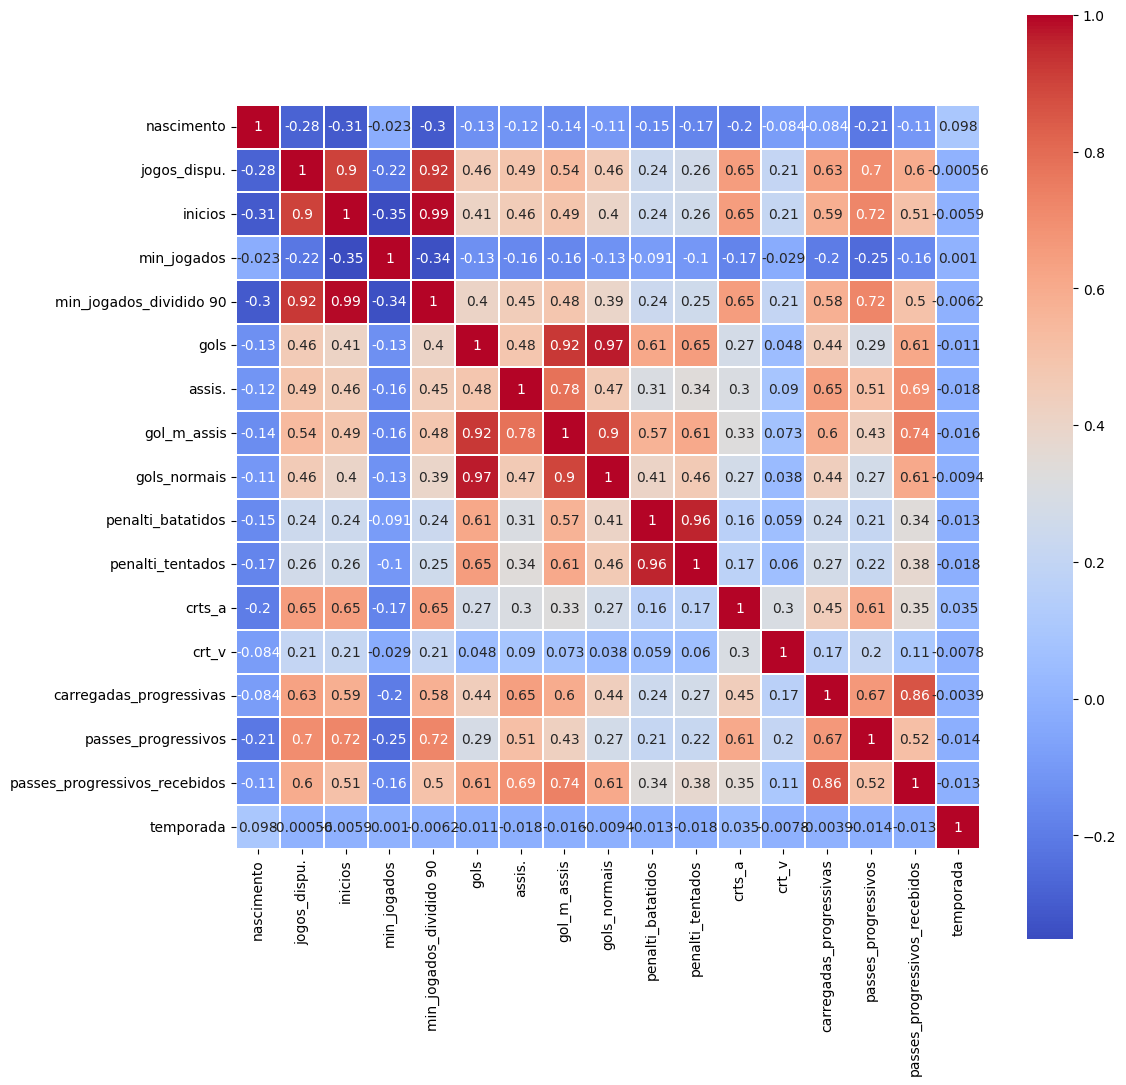

In [235]:
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

In [236]:
# listando features categoricas e numéricas:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['jogador', 'nacionalidade', 'posicao', 'equipe']
numerical_attributes: ['nascimento', 'jogos_dispu.', 'inicios', 'min_jogados', 'min_jogados_dividido 90', 'gols', 'assis.', 'gol_m_assis', 'gols_normais', 'penalti_batatidos', 'penalti_tentados', 'crts_a', 'crt_v', 'carregadas_progressivas', 'passes_progressivos', 'passes_progressivos_recebidos', 'temporada']


In [237]:
#df.loc[df["jogador"]=='German']

df.query('jogador == "Diego"')

,jogador,nacionalidade,posicao,equipe,nascimento,jogos_dispu.,inicios,min_jogados,min_jogados_dividido 90,gols,...,gol_m_assis,gols_normais,penalti_batatidos,penalti_tentados,crts_a,crt_v,carregadas_progressivas,passes_progressivos,passes_progressivos_recebidos,temporada


In [238]:
df.jogador.sort_values().value_counts().head(10)

Danilo            7
João Paulo        7
Marquinhos        7
Marlon            7
Pedro Henrique    7
Luiz Henrique     7
Chico             6
Willian           6
Vinícius          6
Richard           6
Name: jogador, dtype: int64